## Clustering Penguins

Data come from Kaggle: `penguins.csv`.
We will apply a few clustering algorithms to see if there are clusters from measure features.

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


There are some `NaN`, so we need to get rid of them

We see that there are four features plus the sex of the penguins. Culmen refers to the beaks:
1. Culmen Length: This is the measurement from the tip of the upper mandible to the base of the bill (where it meets the skull). 
2. Culmen Depth: This measurement considers the exposed part of the culmen, where the feathers do not conceal it.

We will drop `sex` from the data frame.

In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


There are some outliers in `flipper_length_mm`; it should not be negative or be too big.  Let's remove any row with negative or greater than 1000 flipper length.  How many rows are left?

In [4]:
df = df.dropna(how = 'all')
df = df[df['flipper_length_mm'] > 0]
df = df[df['flipper_length_mm'] < 1000]

In [5]:
X = df[ ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
X.shape

(340, 4)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

Let's run KMeans with number of clusters from 2 to 8 and look at inertia and mean silhouette score.

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

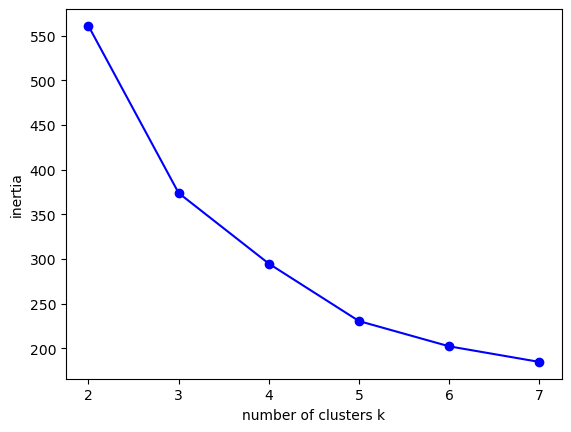

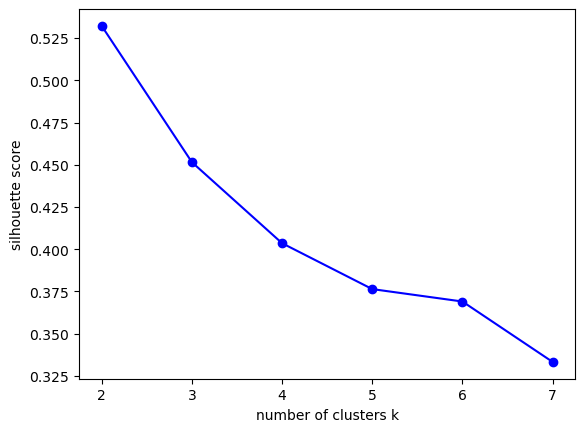

In [32]:
inertia = []
silhoue = []
for k in range(2,8):
    km = KMeans(k).fit(X_new)
    inertia.append(km.inertia_)
    silhoue.append(metrics.silhouette_score(X_new,km.labels_,metric='euclidean'))
#
plt.plot(range(2,8),inertia,'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.show()
plt.plot(range(2,8),silhoue,'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('silhouette score')
plt.show()

Are the results consistent? Do a `seaborn` scatter plot with x-axis being `body_mass_g` and y-axis being `culmen_length_mm`, set `hue` being the predicted label. Do it for what you think is the best k.

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


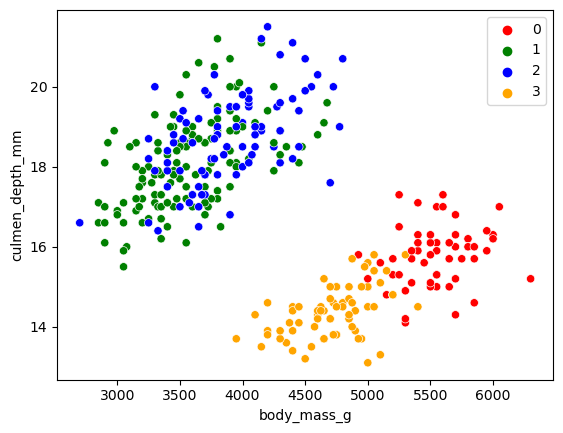

In [33]:
km4 = KMeans(4).fit(X_new)
ypred = km4.predict(X_new)
sns.scatterplot(x='body_mass_g',y='culmen_depth_mm',data=X,hue=ypred,palette=['red','green','blue','orange'])
plt.show()

Let's do pair plots and try to see if we can get some insight.

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


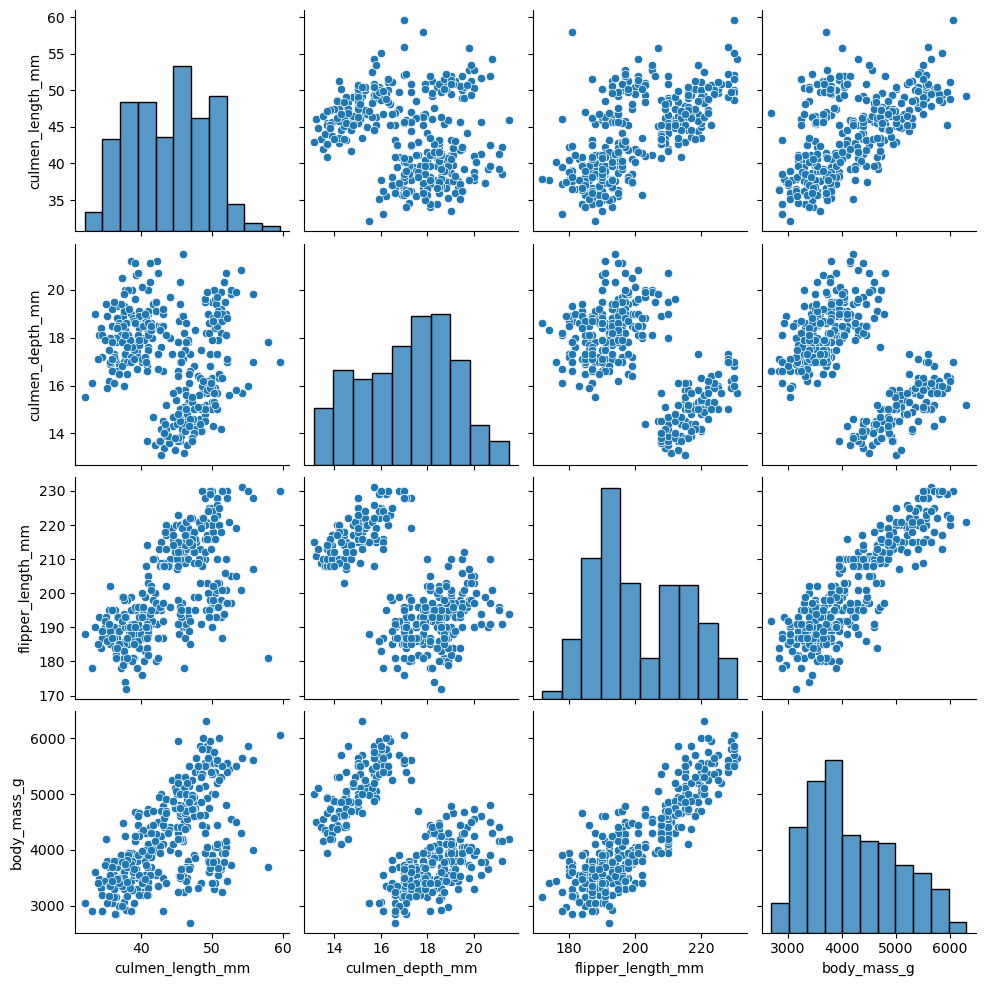

In [8]:
sns.pairplot(X)

## Your turn

Now, try the following methods
1. Spectral Clustering with 2 and 3 clusters.
2. DBSCAN - how many clusters did it create?
3. Agglomerative clustering with 2 and 3 clusters.

/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/Alex_1/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


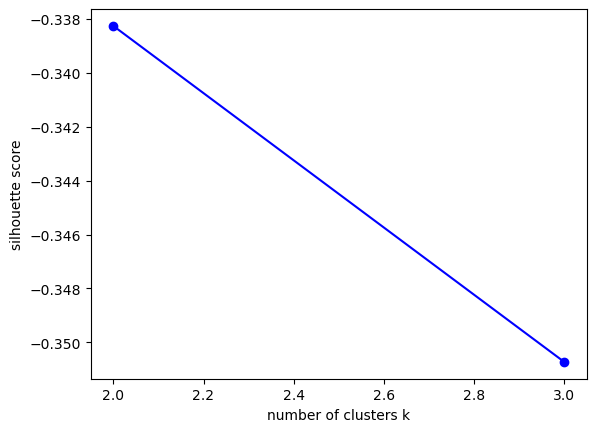

In [29]:
silhoue = []
for k in range(2,4):
    s = SpectralClustering(n_clusters = k).fit(X)
    silhoue.append(metrics.silhouette_score(X,s.labels_,metric='euclidean'))
#
plt.plot(range(2,4),silhoue,'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('silhouette score')
plt.show()

In [27]:
dbscan = DBSCAN(eps=75, min_samples=10)
cluster_labels = dbscan.fit_predict(X)

num_clusters = len(np.unique(cluster_labels)) - (1 if -1 in cluster_labels else 0)

print("Number of clusters:", num_clusters)

Number of clusters: 3


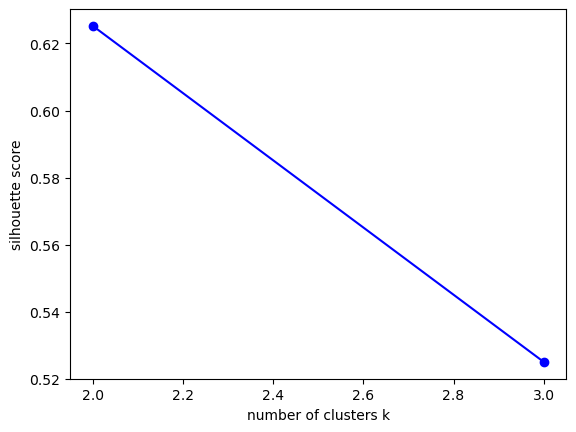

In [30]:
silhoue = []
for k in range(2,4):
    a = AgglomerativeClustering(n_clusters=k).fit(X)
    silhoue.append(metrics.silhouette_score(X,a.labels_,metric='euclidean'))

plt.plot(range(2,4),silhoue,'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('silhouette score')
plt.show()